<a href="https://colab.research.google.com/github/francescodilucia8/pytorch_exp/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
#Create a Module that inherits nn.MOdule
class Model(nn.Module):
  #Input Layer(4 features of the flower)-->
  #Hidden layer 1(n1)-->
  #Hidden layer 2(n2)-->
  #Output(3 classes of Iris flower)
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1= nn.Linear(in_features,h1)
    self.fc2= nn.Linear(h1,h2)
    self.out= nn.Linear(h2,out_features)


  def forward(self,x):
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= self.out(x)

    return x

In [5]:
#pick a manual seed for randomization
torch.manual_seed(41)
#create an instance of model
model=Model()

In [6]:
import pandas as pd #for data manipulation. python library for datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)

In [11]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
my_df['species']=my_df['species'].replace('setosa',0.0)
my_df['species']=my_df['species'].replace('versicolor',1.0)
my_df['species']=my_df['species'].replace('virginica',2.0)

<ipython-input-9-c66242885670>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species']=my_df['species'].replace('virginica',2.0)


In [13]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [10]:
#Train Test Split; set X and y
X=my_df.drop('species', axis=1)
y=my_df['species']


In [13]:
#convert these to numpy arrays
X=X.values
y=y.values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [16]:
#set the ctiterion of model to measure the error, how far off the predictions are from the data
criterion=nn.CrossEntropyLoss()

In [17]:
#Choose Optimizer and lr(learning rate)
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [20]:
#train our model
#Epochs? one run trhough all the training data in our network
epochs=100
losses=[]
for i in range(epochs):
  #go forward and get a prediction
  y_pred=model.forward(X_train)
  #Measure the loss/error
  loss=criterion(y_pred,y_train)
  #keep track of our losses
  losses.append(loss.detach().numpy())
  if i%10==0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 0.06766883283853531
Epoch: 10 Loss: 0.06133640930056572
Epoch: 20 Loss: 0.05724036693572998
Epoch: 30 Loss: 0.05433471500873566
Epoch: 40 Loss: 0.05210398510098457
Epoch: 50 Loss: 0.050285454839468
Epoch: 60 Loss: 0.04873967543244362
Epoch: 70 Loss: 0.0473872572183609
Epoch: 80 Loss: 0.04617621749639511
Epoch: 90 Loss: 0.045075297355651855


Text(0.5, 0, 'Epoch')

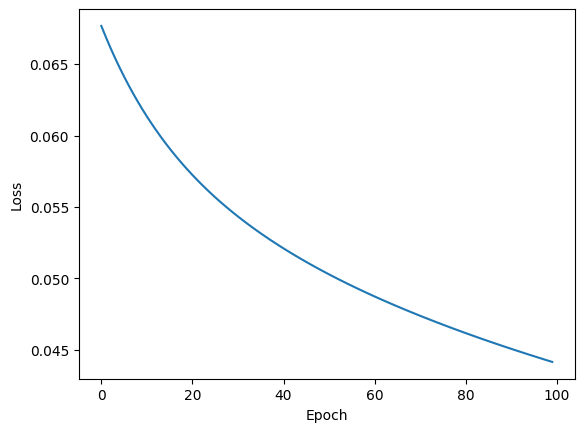

In [21]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')